In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir("../")
from utils import convert_las_crs_to_projected_coords, sigma_stress_theta1

In [27]:
# Convert pointcloud to projected coords
# UTM Zone 11N - 26711 (NV)
# UTM Zone 12N - 26912 (AZ)
convert_las_crs_to_projected_coords("Pointclouds/CableMnt_RA_2019_Pointcloud.laz",
                                    4326,26712,inp_fmt=".laz",out_fmt=".laz")

### Calculations for figure 1

In [2]:
outer_wedge = np.around(7.5 / np.sin(np.radians(80)), 3)
inner_wedge = np.around(np.sqrt(outer_wedge**2 + 2.5**2), 3)

outer_wedge, inner_wedge

(7.616, 8.016)

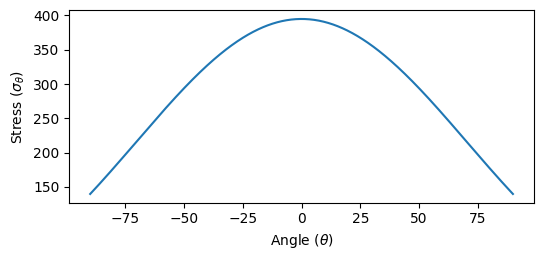

In [3]:
k1 = 1000 * np.sqrt(np.pi * (2.5/2))
r = inner_wedge/2

angles = np.arange(-90,90.2,0.2)
sig1 = sigma_stress_theta1(k1,r,angles)

fig,ax = plt.subplots(figsize=(6,2.5))
ax.plot(angles,sig1)
ax.set_xlabel("Angle ($\\theta$)"),ax.set_ylabel("Stress ($\\sigma_{\\theta}$)")

plt.savefig("Figures/max_stress_k1.png", dpi=200, facecolor="white", edgecolor="none",bbox_inches="tight")
plt.show()

In [4]:
crit_stress = 1981 / np.sqrt(np.pi*1.25)